# Financial Analytics — Exploratory Data Analysis of stock data

With an increase in the penetration of analytics into numerous facets of our lives, Finance is definitely one of the earliest to catch onto this trend. Given the burgeoning market size in fintech and finance, it would be great to impart some financial skills!
Note: This article is meant to teach you some basics of manipulating a stock data set and not make you a quant/stockbroker/algorithmic trader. You would surely need more knowledge in trading ,finance and computing in order to advance in those areas.

### 1. Importing the data
Most of the financial dataset that you would require can be easily found on Yahoo Finance! You just need to key in the stock data, click on Historical Data
[click here](https://sg.finance.yahoo.com/quote/FB/history?p=FB&guccounter=1&guce_referrer=aHR0cHM6Ly90b3dhcmRzZGF0YXNjaWVuY2UuY29tL2ZpbmFuY2lhbC1hbmFseXRpY3MtZXhwbG9yYXRvcnktZGF0YS1hbmFseXNpcy1vZi1zdG9jay1kYXRhLWQ5OGNiYWRmOThiOQ&guce_referrer_sig=AQAAAB4n8oitemNWFIQQGfqSDO4fMyh5FccDEi9l-Hg2YpOQabhBMczxpkRig75rLFN2Hz8UlkYFedDAoiEMw81fkUXKW7dOM_CL_1ScfLqeoyrbJDecKyEw7Mw-cTx7sAO-IFw7ikNivheVwIWIlFbdgoZWIaYYzB9d9miQyeHlPUSo)

After that, set the appropriate time period and remember to click Apply! (Heck, when I first started i kept wondering why the csv i downloaded did not give me the right time frame)

In [1]:
import pandas as pd 
import numpy as np
from scipy.stats import norm

As usual, we should always inspect the data and understand the dataframe before we do any further analysis

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Indupuvi/Chakradbi/main/FB.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-15,306.339996,310.140015,304.100006,307.820007,307.820007,14558300
1,2021-04-16,308.170013,308.950012,304.609985,306.179993,306.179993,13059200
2,2021-04-19,305.010010,307.700012,300.559998,302.239990,302.239990,14553500
3,2021-04-20,301.989990,305.100006,297.209991,302.649994,302.649994,16796400
4,2021-04-21,301.950012,301.980011,297.390015,301.470001,301.470001,14863500


Next we will inspect the datatype of the dataframe using df.info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


Here, we can see that the ‘Date’ column is displayed as an object instead of datetime datatype. This can be problematic when we are plotting histograms/line chart and so we convert it to a datetime object first

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       254 non-null    datetime64[ns]
 1   Open       254 non-null    float64       
 2   High       254 non-null    float64       
 3   Low        254 non-null    float64       
 4   Close      254 non-null    float64       
 5   Adj Close  254 non-null    float64       
 6   Volume     254 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.0 KB


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([18748., 18809., 18871., 18932., 18993., 19052., 19113.]),
 [Text(18748.0, 0, '2021-05'),
  Text(18809.0, 0, '2021-07'),
  Text(18871.0, 0, '2021-09'),
  Text(18932.0, 0, '2021-11'),
  Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05')])

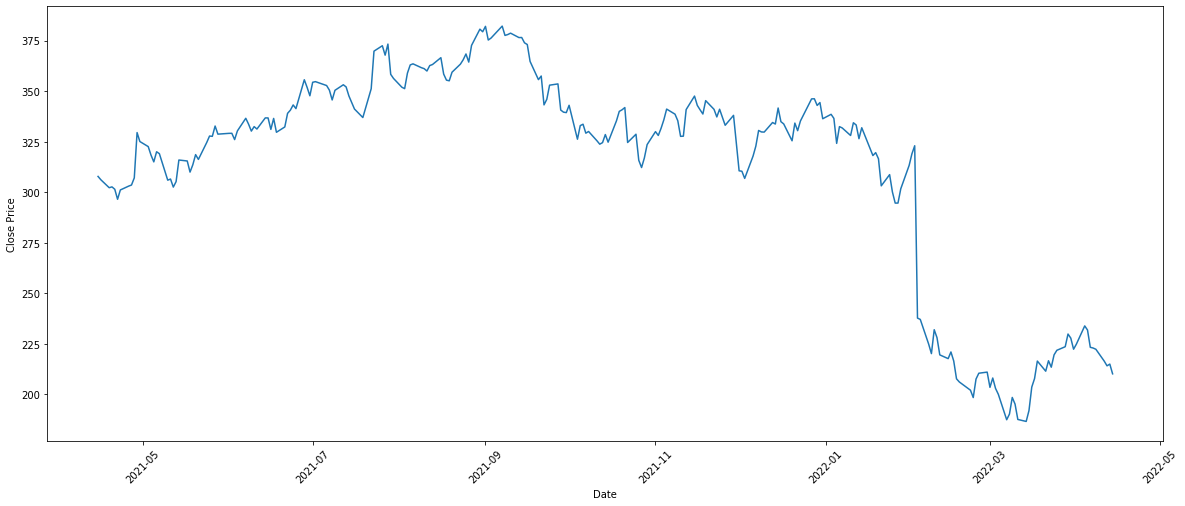

In [6]:
plt.figure(figsize=(20,8))
plt.plot('Date','Close',data=df)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

If you have been following financial news, you would know that the huge drop in March is due to Facebook Meta


[Facebook News](https://www.cnbc.com/2022/02/03/facebooks-232billion-drop-in-value-sets-all-time-record.html)

## 3. Creation of columns
Now, let us create some useful columns for us to make some interesting inferences about the stock
First, we will create the column ‘daily lag’ which is basically just shifting the ‘Close’ price by one day back. (Note: there are often various metrics we can use but i am choosing ‘Close’ for convenience)

In [ ]:
df['Daily Lag'] = df['Close'].shift(1)
df.head()

The reason for creating the ‘Daily Lag’ is to allow us to create the column ‘Daily Returns’

Daily returns tells us the returns that we obtain in a day after the stock price closes (Duh!)




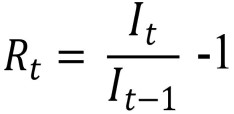

In [ ]:
df['Daily Returns'] = (df['Daily Lag']/df['Close']) -1
df.head()

Now, let us look at the ‘Daily Returns’

In [ ]:
df['Daily Returns'].hist()

In [ ]:
mean = df['Daily Returns'].mean()
std = df['Daily Returns'].std()
print('mean =',mean)
print('Std deviation =',std)

Ouch,generally returns are negative but remember that this only considers the returns on a day-to-day basis and so it just tells you that in general the return if you buy and sell on the same day, you will make a loss.

In [ ]:
df['Daily Returns'].hist(bins=20)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)

Lastly, We  will introduce kurtosis value to you.

Kurtosis tells you the ‘fatness’ of the tail and it is important because it tells you how ‘extreme’ can the values get.

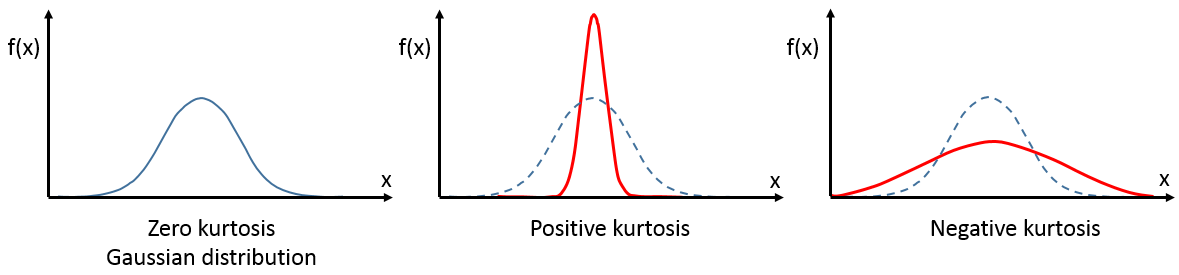

In [ ]:
df['Daily Returns'].kurtosis()

In our case, the value is positive, so this indicates that the chance of ‘extreme’ values are rare. 